## Python绘制热力图查看两个分类变量之间的强度分布

### 热力图(heat map)

热力图（或者色块图），由小色块组成的二维图表，其中：
* x、y轴可以是分类变量，对应的小方块由连续数值表示颜色强度
* 即用两个分类字段确定数值点的位置，用于展示数据的分布情况

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

### 实例1：模拟绘制北京景区热度图

In [2]:
df = pd.DataFrame(
    np.random.rand(4, 7), 
    index = ["天安门", "故宫", "奥林匹克森林公园", "八达岭长城"],
    columns = ["周一", "周二", "周三", "周四", "周五", "周六", "周日"]
)
df

,周一,周二,周三,周四,周五,周六,周日
天安门,0.074419,0.214726,0.999661,0.665986,0.677667,0.197178,0.608004
故宫,0.892415,0.944866,0.506391,0.974252,0.371753,0.683809,0.715924
奥林匹克森林公园,0.659481,0.790725,0.266958,0.641157,0.726409,0.746208,0.213861
八达岭长城,0.891930,0.305052,0.054287,0.635466,0.890898,0.259909,0.567301


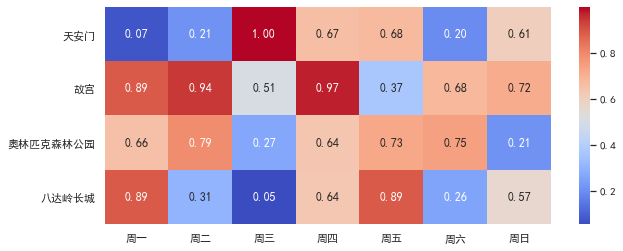

In [3]:
plt.figure(figsize=(10, 4))
sns.heatmap(df, annot=True, fmt = ".2f", cmap = "coolwarm")

### 实例2：绘制泰坦尼克事件与存亡变量的关系

In [5]:
# 读取并合并泰坦尼克数据
df = pd.concat(
    [
        pd.read_csv("./datas/titanic/titanic_train.csv"),
        pd.read_csv("./datas/titanic/titanic_test.csv")
    ]
)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
# pands把字符串类型的列，变成分类数字编码
for field in ["Sex", "Cabin", "Embarked"]:
    df[field] = df[field].astype("category").cat.codes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int8   
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int16  
 11  Embarked     1309 non-null   int8   
dtypes: float64(3), int16(1), int64(4), int8(2), object(2)
memory usage: 107.4+ KB


In [10]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,-1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,106,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,-1,2


In [11]:
# 计算不同变量之间两两相关系数
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.038354,0.013406,0.028814,-0.055224,0.008942,0.031428,-0.012096,-0.048530
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.277885,-0.176509
Pclass,-0.038354,-0.338481,1.000000,0.124617,-0.408106,0.060832,0.018322,-0.558629,-0.534483,0.192867
Sex,0.013406,-0.543351,0.124617,1.000000,0.063645,-0.109609,-0.213125,-0.185523,-0.126367,0.104818
Age,0.028814,-0.077221,-0.408106,0.063645,1.000000,-0.243699,-0.150917,0.178740,0.190984,-0.089292
SibSp,-0.055224,-0.035322,0.060832,-0.109609,-0.243699,1.000000,0.373587,0.160238,-0.005685,0.067802
Parch,0.008942,0.081629,0.018322,-0.213125,-0.150917,0.373587,1.000000,0.221539,0.029582,0.046957
Fare,0.031428,0.257307,-0.558629,-0.185523,0.178740,0.160238,0.221539,1.000000,0.340217,-0.241442
Cabin,-0.012096,0.277885,-0.534483,-0.126367,0.190984,-0.005685,0.029582,0.340217,1.000000,-0.126482
Embarked,-0.048530,-0.176509,0.192867,0.104818,-0.089292,0.067802,0.046957,-0.241442,-0.126482,1.000000


d:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


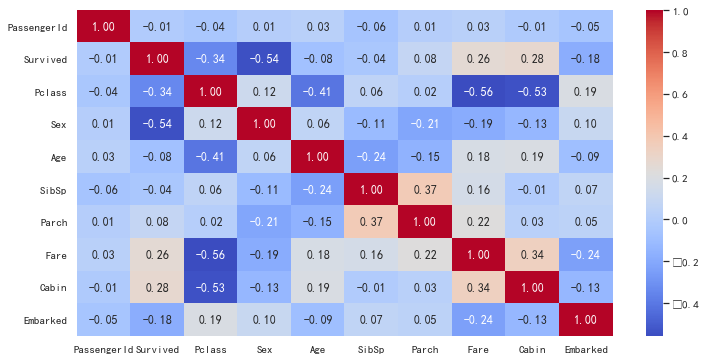

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")